# we will use three machine learning models and filter out the one with the best results

we will make use of SVM model, decision trees and random forest models.


In [58]:

# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [59]:
#load the dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

train_df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [60]:
#combine the dataframes to randomize the values
df = train_df.merge(test_df, how='outer')
df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
691,1,0.29,1,0.0,0,0,0,0,13,114,811,1
692,1,0.40,1,0.0,0,0,0,0,4,150,164,1
693,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
694,0,0.17,1,0.0,0,0,0,0,1,219,1695,1


In [61]:
#get random values for training and testing
label = df["fake"]
features = df. drop('fake', axis=1)
#randomize the values to get training and testing set
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.20, random_state=42)


<AxesSubplot:ylabel='fake'>

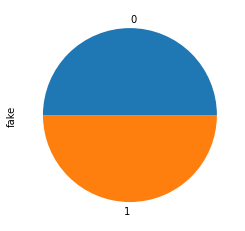

In [64]:
#plot the values
value_count = label.value_counts()
value_count.plot(kind='pie')

In [68]:
#define the first model, SVM, we will use the classifier
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [69]:
#check performance of the algorithm
y_pred = clf.predict(X_test)

In [70]:
#calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred) *100
accuracy

90.71428571428571

In [71]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.92      0.90      0.91        73\n           1       0.90      0.91      0.90        67\n\n    accuracy                           0.91       140\n   macro avg       0.91      0.91      0.91       140\nweighted avg       0.91      0.91      0.91       140\n'

In [72]:
#save the model
filename = 'clf_mode.sav'
pickle.dump(clf, open(filename, 'wb'))

# Decision Trees classifier model

We will be using the data that we splitted

In [28]:
#start by importing relevant modules
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [29]:
# Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)

In [30]:
# Performing training
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [46]:
 # Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 150, max_depth = 3, min_samples_leaf = 5)
  
    

In [47]:
# Performing training
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=150)

In [48]:
#do predictions
# Predicton on test with giniIndex
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

In [49]:
#calculate scores
gni = accuracy_score(y_test,y_pred_gini)*100
entr = accuracy_score(y_test,y_pred_entropy)*100
gni_report = classification_report(y_test, y_pred_gini)
entropy_report = classification_report(y_test,y_pred_entropy)

In [50]:
print("Gini accuracy is ", gni, "and entropy accuracy is ", entr)

Gini accuracy is  91.42857142857143 and entropy accuracy is  83.57142857142857


In [40]:
print("gni Report ", gni_report)
print()
print("Entropy Report", entropy_report)

gni Report                precision    recall  f1-score   support

           0       0.92      0.92      0.92        73
           1       0.91      0.91      0.91        67

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140


Entropy Report               precision    recall  f1-score   support

           0       0.88      0.79      0.83        73
           1       0.80      0.88      0.84        67

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.84      0.84      0.84       140



In [51]:
#save the models
filename = 'gni.sav'
pickle.dump(clf_gini, open(filename, 'wb'))
filename = 'entr.sav'
pickle.dump(clf_entropy, open(filename, 'wb'))

# Random Forests

In [52]:
#import the classifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

C:\users\user\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=50, random_state=44)

In [54]:
#perform prediction
predictions = rf_model.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test,predictions)*100
report = classification_report(y_test, predictions)

In [56]:
print("Accuracy is ", accuracy, "and report is ", report)

Accuracy is  93.57142857142857 and report is                precision    recall  f1-score   support

           0       0.91      0.97      0.94        73
           1       0.97      0.90      0.93        67

    accuracy                           0.94       140
   macro avg       0.94      0.93      0.94       140
weighted avg       0.94      0.94      0.94       140



In [57]:
#savve the model
filename = 'random.sav'
pickle.dump(rf_model, open(filename, 'wb'))